<a href="https://colab.research.google.com/github/dikoharyadhanto/Data-Analyst-Capstone-Project-Coursera/blob/main/M4DataVisualization_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [347]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [348]:
import pandas as pd

## Demo: How to run an sql query


In [349]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [350]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [351]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [352]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [ ]:
% matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')  # optional: for ggplot-like style


QUERY = """
SELECT Respondent, ConvertedComp
FROM master
"""
df_ConvertedComp = pd.read_sql_query(QUERY,conn)

# plot histogram
df_ConvertedComp['ConvertedComp'].plot(kind='hist', figsize=(8, 5))
# add a title to the histogram
plt.title('Histogram of Converted Compensation')
# add y-label
plt.ylabel('Number of Respondents')
# add x-label
plt.xlabel('Annual USD')

plt.show()

### Box Plots


Plot a box plot of `Age.`


In [354]:
QUERY = """
SELECT Respondent, Age
FROM master
"""
df_Age = pd.read_sql_query(QUERY,conn)

df_Age['Age'].describe()

count    11111.000000
mean        30.779318
std          7.393680
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [ ]:
df_Age['Age'].plot(kind='box', figsize=(10, 7))

plt.title("Box plots of Respondent's Age")
plt.ylabel('Interval Age')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [356]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df_corr = pd.read_sql_query(QUERY,conn)

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          11111 non-null  float64
 1   WorkWeekHrs  11276 non-null  float64
dtypes: float64(2)
memory usage: 178.2 KB


In [357]:
df_corr.corr()

,Age,WorkWeekHrs
Age,1.000000,0.036517
WorkWeekHrs,0.036517,1.000000


In [ ]:
df_corr.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10,6), color='darkblue')

plt.title('Relation Between Age and Work Week Hours of Respondents')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [359]:
QUERY = """
SELECT CodeRevHrs, WorkWeekHrs, Age
FROM master
"""
df_bubble = pd.read_sql_query(QUERY,conn)

df_bubble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CodeRevHrs   8972 non-null   float64
 1   WorkWeekHrs  11276 non-null  float64
 2   Age          11111 non-null  float64
dtypes: float64(3)
memory usage: 267.3 KB


In [360]:
# normalize Age data
norm_Age = (df_bubble['Age'] - df_bubble['Age'].min()) / (df_bubble['Age'].max() - df_bubble['Age'].min())

In [ ]:
df_bubble.plot(kind='scatter',
               x='WorkWeekHrs',
               y='CodeRevHrs',
               figsize=(14, 8),
               alpha=0.5,  # transparency
               color='green',
               s=norm_Age * 1000 + 10,  # pass in weights 
               )

plt.title('Relation Between WorkWeekHrs and CodeRevHrs of Respondents')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.legend(['Age'], loc='upper right', fontsize='x-large')

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [362]:
QUERY = """
SELECT * 
FROM DatabaseDesireNextYear
"""
df_db = pd.read_sql_query(QUERY,conn)

df_db.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [363]:
# group respondents by database and apply count() function 
df_groupby = df_db.groupby('DatabaseDesireNextYear', axis=0).count()

df_groupby.sort_values(["Respondent"], ascending=False, inplace=True)

In [364]:
df_pie = df_groupby.head()
df_pie

,Respondent
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


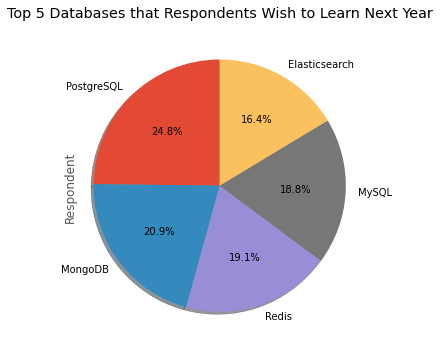

In [365]:
# autopct create %, start angle represent starting point
df_pie['Respondent'].plot(kind='pie',
                          figsize=(5, 6),
                          autopct='%1.1f%%', # add in percentages
                          startangle=90,     # start angle 90°
                          shadow=True,       # add shadow      
                          )

plt.title('Top 5 Databases that Respondents Wish to Learn Next Year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [366]:
QUERY = """
SELECT * 
FROM LanguageDesireNextYear
"""
df_lg = pd.read_sql_query(QUERY,conn)

df_lg.head()

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell


In [367]:
# group respondents by language and apply count() function 
df_lg = df_lg.groupby('LanguageDesireNextYear', axis=0).count()

df_lg.sort_values(["Respondent"], ascending=False, inplace=True)

In [368]:
df_pie = df_lg.head()
df_pie

,Respondent
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


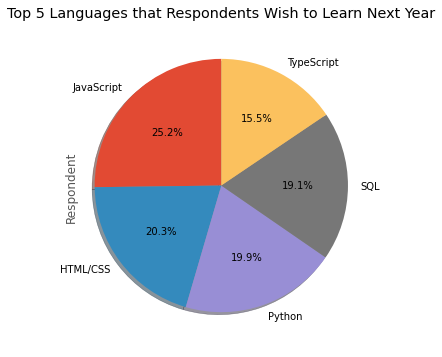

In [369]:
# autopct create %, start angle represent starting point
df_pie['Respondent'].plot(kind='pie',
                          figsize=(5, 6),
                          autopct='%1.1f%%', # add in percentages
                          startangle=90,     # start angle 90°
                          shadow=True,       # add shadow      
                          )

plt.title('Top 5 Languages that Respondents Wish to Learn Next Year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [370]:
QUERY = """
SELECT * 
FROM LanguageWorkedWith
"""
df_lg = pd.read_sql_query(QUERY,conn)

df_lg.head()

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL


In [371]:
# group respondents by language and apply count() function 
df_lg = df_lg.groupby('LanguageWorkedWith', axis=0).count()

df_lg.sort_values(["Respondent"], ascending=False, inplace=True)

In [372]:
df_lg

,Respondent
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542
Java,4506
C#,4288
TypeScript,3232
PHP,2913


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [ ]:
QUERY = """
SELECT CodeRevHrs, WorkWeekHrs, Age
FROM master
"""
df_stacked = pd.read_sql_query(QUERY,conn)

df_stacked.info()

In [374]:
df_stacked = df_stacked.loc[(df_stacked['Age'] >= 30) & (df_stacked['Age'] <= 35)].reset_index().drop(columns=['index'])
df_stacked

,CodeRevHrs,WorkWeekHrs,Age
0,3.0,8.0,31.0
1,2.0,40.0,34.0
2,2.0,40.0,32.0
3,15.0,42.0,34.0
4,2.0,40.0,33.0
...,...,...,...
2937,4.0,42.0,32.0
2938,2.0,50.0,32.0
2939,14.0,56.0,32.0
2940,5.0,40.0,34.0


In [ ]:
import matplotlib.pyplot as plt
df_stacked.groupby(['CodeRevHrs','Age'])['WorkWeekHrs'].median().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True, figsize=(12, 5))
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs For The Age Group 30 to 35',
          loc='center',pad=20, fontsize=20, color='blue')
plt.xlabel('CodeRevHrs', fontsize = 10)
plt.ylabel('WorkWeekHrs', fontsize = 10)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='Age')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 25 to 30.


In [376]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
"""
df_line = pd.read_sql_query(QUERY,conn)

df_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  10582 non-null  float64
 1   Age            11111 non-null  float64
dtypes: float64(2)
memory usage: 178.2 KB


In [377]:
df_line = df_line.loc[(df_line['Age'] >= 25) & (df_line['Age'] <= 30)].reset_index().drop(columns=['index'])
df_line.dropna(inplace=True)
df_line

,ConvertedComp,Age
0,90000.0,28.0
1,455352.0,26.0
2,65277.0,29.0
3,20623.0,27.0
4,107000.0,27.0
...,...,...
4311,7724.0,26.0
4312,35518.0,26.0
4313,26586.0,26.0
4314,19880.0,25.0


In [378]:
df_line = df_line.groupby('Age', axis=0).median()
df_line

,ConvertedComp
Age,
25.0,39920.0
26.0,43834.0
27.0,49620.0
28.0,51559.0
29.0,55674.0
30.0,56376.0


In [ ]:
df_line.plot(kind='line')

plt.title('Average Compensation Based on Age Groups')
plt.ylabel('Converted Compensation (Annual USD')
plt.xlabel('Age')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `DevType.`


In [380]:
QUERY = """
SELECT *
FROM DevType
"""
df_bar = pd.read_sql_query(QUERY,conn)

df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35314 entries, 0 to 35313
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Respondent  35314 non-null  int64 
 1   DevType     35314 non-null  object
dtypes: int64(1), object(1)
memory usage: 551.9+ KB


In [381]:
df_bar.head()

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"


In [382]:
df_bar = df_bar.groupby('DevType', axis=0).count()

df_bar.sort_values(["Respondent"], ascending=True, inplace=True)

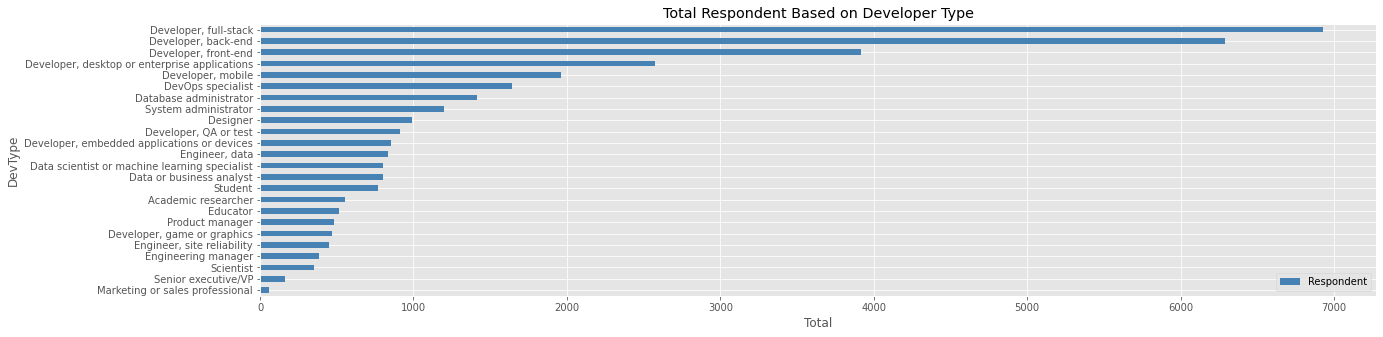

In [383]:
# generate plot
df_bar.plot(kind='barh', figsize=(10, 5), color='steelblue')
plt.xlabel('Total')
plt.title('Total Respondent Based on Developer Type')

plt.show()

Close the database connection.


In [384]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
